In [33]:
# Load libraries
import numpy as np
from numpy import arange
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sns

In [34]:

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [35]:
df1 = pd.read_excel("incident-Jul 2016-Oct2016.xlsx")
df2 = pd.read_excel("incident-Nov 2016-Feb2017.xlsx")
df3 = pd.read_excel("incident-Mar 2017-Jun2017.xlsx")
df4 = pd.read_excel("incident-Jul 2017-Oct2017.xlsx")
df5 = pd.read_excel("incident-Nov 2017-Feb2018.xlsx")
df6 = pd.read_excel("incident-Mar 2018-Jun2018.xlsx")
df7 = pd.read_excel("incident-Jul 2018-Oct2018.xlsx")

In [36]:
# concatenate all the files into one dataframe
frames = [df1, df2, df3, df4, df5, df6, df7]
df_test = pd.concat(frames)
df_test.head(2)

,Number,Priority,Caller [Incident],Assignment group,Created,Assigned to,Caller,Department,Short description,Description,Resolved,Reassignment count
0,INC0454829,Sev4–Single User Issue-Not Urgent <=20 Days Re...,Brian Conrad,GSO - Service Desk,2016-10-31 23:40:58,Tarun Vakharia,Brian Conrad,IFBG,login issue,-Verified user details.(Employee# & Manager na...,2016-10-31 23:40:58,0
1,INC0454813,Sev4–Single User Issue-Not Urgent <=20 Days Re...,Kim Walker,GSO - Service Desk,2016-10-31 22:42:56,Tarun Vakharia,Kim Walker,INBG,OUTLOOK,\n\nreceived from: kim.walker@kennametal.com\n...,2016-10-31 23:59:10,0


In [37]:
# Trying to donwload all words from Short description & description
SD=df_test['Short description']
DD=df_test['Description']

In [38]:
SD.head(3)

0           login issue
1               OUTLOOK
2    Cant log in to VPN
Name: Short description, dtype: object

In [39]:
DD.head(3)

0    -Verified user details.(Employee# & Manager na...
1    \n\nreceived from: kim.walker@kennametal.com\n...
2    \n\nreceived from: Jaques.VanDerBerg@kennameta...
Name: Description, dtype: object

In [40]:
#Creating a sets whith all distinct words for short description
from nltk.tokenize import word_tokenize
tokenized_word_SD=word_tokenize(str(SD))
#testing for 10 words so seprated
top10=tokenized_word_SD[:10]
top10

['0', 'login', 'issue', '1', 'OUTLOOK', '2', 'Cant', 'log', 'in', 'to']

In [41]:
#Creating a sets whith all distinct words for description
from nltk.tokenize import word_tokenize
tokenized_word_DD=word_tokenize(str(DD))

In [42]:
#Short description
from nltk.probability import FreqDist
fdist_SD = FreqDist(tokenized_word_SD)
print(fdist_SD)

<FreqDist with 302 samples and 459 outcomes>


In [43]:
#Description
from nltk.probability import FreqDist
fdist_DD = FreqDist(tokenized_word_DD)
print(fdist_DD)

<FreqDist with 332 samples and 524 outcomes>


In [44]:
fdist_SD.most_common()

[('to', 31),
 ('...', 21),
 ('Unable', 11),
 ('for', 8),
 ('-', 7),
 ('VPN', 6),
 (':', 6),
 ('New', 6),
 ('the', 6),
 ('in', 5),
 ('not', 5),
 ('SAP', 5),
 ('login', 4),
 ('log', 4),
 ('of', 4),
 ('Tool', 3),
 ('and', 3),
 ('on', 3),
 ('ADP', 3),
 ('payslips', 3),
 (',', 3),
 ('from', 3),
 ('Request', 3),
 ('(', 3),
 ('issue', 2),
 ('page', 2),
 ('Skype', 2),
 ('reporter', 2),
 ('add', 2),
 ('Ticket', 2),
 ('update', 2),
 ('time', 2),
 ('User', 2),
 ('reset', 2),
 ('password', 2),
 ('Account', 2),
 ('screen', 2),
 ('will', 2),
 ('locked', 2),
 ('check', 2),
 ('Management', 2),
 ('POS', 2),
 ('Konnect', 2),
 ('Add', 2),
 ('Onboarding', 2),
 ('report', 2),
 ('WM', 2),
 ('Create', 2),
 ('Order', 2),
 ('0', 1),
 ('1', 1),
 ('OUTLOOK', 1),
 ('2', 1),
 ('Cant', 1),
 ('3', 1),
 ('access', 1),
 ('adp', 1),
 ('4', 1),
 ('Euremote', 1),
 ('5', 1),
 ('error', 1),
 ('6', 1),
 ('7', 1),
 ('Event', 1),
 ('Critical', 1),
 ('AXHQ30450.kmtl.com', 1),
 ('The', 1),
 ('value', 1),
 ('o', 1),
 ('8', 1),
 

In [45]:
fdist_DD.most_common(10)

[('...', 37),
 ('to', 29),
 (':', 15),
 ('Unable', 10),
 ('from', 9),
 ('the', 7),
 (',', 7),
 ('\\n\\nreceived', 6),
 ('@', 6),
 ('-', 5)]

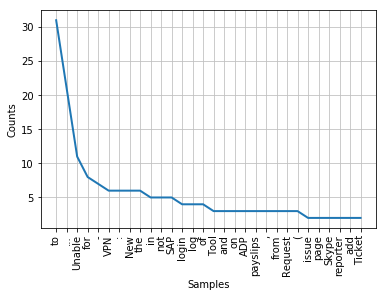

In [46]:
import matplotlib.pyplot as plt
fdist_SD.plot(30,cumulative=False)
plt.show()

In [47]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)
type(stop_words)

{'his', "you'd", 'between', 'very', "shouldn't", 'we', 'then', 'wouldn', 'will', 'until', "you've", 'only', "isn't", 'o', 'myself', 'over', 'didn', 'can', 'wasn', 'whom', "that'll", "won't", 'how', "didn't", 'where', "it's", 'so', 'yourself', "mightn't", 'of', 'yourselves', 'was', 'the', 'her', 'here', "doesn't", 'further', "mustn't", 'ours', 'but', 'itself', 'a', "don't", 're', 'which', 'up', 'them', "she's", "you're", 'at', 'your', 'isn', 'those', 'hadn', 'shan', 'what', "aren't", 'once', 'it', 'am', 'an', 'with', 'to', 'just', 'each', 'again', 'or', 'off', 'y', "haven't", 'that', 'theirs', 'she', 'these', 'themselves', 'ourselves', 'their', 'you', 'herself', 'about', 'own', 'do', 'below', 't', 'weren', 'hasn', "you'll", "wasn't", 'into', 'having', 'don', 'i', 'does', 'why', 'such', "wouldn't", 'doing', 'in', 'did', 'same', 'needn', 'any', "needn't", 'through', 'him', 'because', "hadn't", 'haven', "shan't", 'if', 'have', 'above', 'both', 'this', 'shouldn', 'some', 'hers', 'll', 'out'

set

In [48]:
num = ["0","1","2","3","4","5", "6", "7","8", "9", "10","11", "12", "13","14", "15", "16","17", "18", "19","20","21","22","23","24"
       "25","26","91","92","93","99","999","...","-",",",":"]
for i in num: 
    stop_words.add(i)
    

In [49]:
print(stop_words)

{'his', "you'd", 'between', 'very', "shouldn't", '9', '18', '23', 'we', '8', '26', 'then', 'wouldn', 'will', '99', 'until', "you've", '92', 'only', "isn't", 'o', 'myself', 'over', 'didn', '5', 'can', 'wasn', 'whom', "that'll", "won't", 'how', '20', "didn't", 'where', '4', "it's", 'so', '10', 'yourself', "mightn't", 'of', 'yourselves', 'was', 'the', 'her', 'here', "doesn't", 'further', "mustn't", 'ours', 'but', 'itself', 'a', "don't", 're', 'which', '...', '0', 'up', 'them', "she's", "you're", 'at', 'your', 'isn', 'those', 'hadn', 'shan', 'what', "aren't", 'once', '7', 'it', 'am', 'an', 'with', 'to', 'just', 'each', '16', 'again', 'or', 'off', 'y', "haven't", 'that', 'theirs', 'she', 'these', 'themselves', 'ourselves', 'their', 'you', 'herself', 'about', 'own', 'do', 'below', 't', 'weren', 'hasn', "you'll", "wasn't", 'into', 'having', 'don', 'i', 'does', 'why', 'such', "wouldn't", 'doing', '19', 'in', 'did', 'same', 'needn', '15', 'any', "needn't", 'through', 'him', ':', 'because', "had

In [50]:
#tokenized_sent1=str(tokenized_word)

In [51]:
filtered_sent_SD=[]
for w in tokenized_word_SD:
    if w not in stop_words:
        filtered_sent_SD.append(w)


In [52]:
filtered_sent_DD=[]
for w in tokenized_word_DD:
    if w not in stop_words:
        filtered_sent_DD.append(w)

In [53]:
print("Tokenized Sentence:",tokenized_word_SD)


Tokenized Sentence: ['0', 'login', 'issue', '1', 'OUTLOOK', '2', 'Cant', 'log', 'in', 'to', 'VPN', '3', 'Unable', 'to', 'access', 'adp', 'page', '4', 'Unable', 'to', 'log', 'in', 'to', 'Euremote', '5', 'Skype', 'error', '6', 'Unable', 'to', 'log', 'in', 'to', 'Tool', 'reporter', 'and', 'Skype', '7', 'Event', ':', 'Critical', ':', 'AXHQ30450.kmtl.com', 'The', 'value', 'o', '...', '8', 'GREQ0449280-', 'Employment', 'Status', '-', 'New', 'Non-Emplo', '...', '9', 'Unable', 'to', 'disable', 'add', 'ins', 'on', 'outlook', '10', 'Ticket', 'update', 'on', 'INC0454773', '11', 'Tool', 'reporter', 'says', 'not', 'connected', 'and', 'unable', 'to', '...', '12', 'ADP', 'site', 'not', 'loading', 'page', 'correctly', '13', 'Unable', 'to', 'login', 'to', 'ADP', 'to', 'see', 'time', 'cards', '14', 'User', 'wants', 'to', 'reset', 'the', 'password', '15', 'Unable', 'to', 'open', 'payslips', '16', 'Ticket', 'update', 'on', 'INC0454743', '17', 'Account', 'expired', 'in', 'AD', '18', 'Unable', 'to', 'login'

In [54]:
print("Filterd Sentence:",filtered_sent_SD)

Filterd Sentence: ['login', 'issue', 'OUTLOOK', 'Cant', 'log', 'VPN', 'Unable', 'access', 'adp', 'page', 'Unable', 'log', 'Euremote', 'Skype', 'error', 'Unable', 'log', 'Tool', 'reporter', 'Skype', 'Event', 'Critical', 'AXHQ30450.kmtl.com', 'The', 'value', 'GREQ0449280-', 'Employment', 'Status', 'New', 'Non-Emplo', 'Unable', 'disable', 'add', 'ins', 'outlook', 'Ticket', 'update', 'INC0454773', 'Tool', 'reporter', 'says', 'connected', 'unable', 'ADP', 'site', 'loading', 'page', 'correctly', 'Unable', 'login', 'ADP', 'see', 'time', 'cards', 'User', 'wants', 'reset', 'password', 'Unable', 'open', 'payslips', 'Ticket', 'update', 'INC0454743', 'Account', 'expired', 'AD', 'Unable', 'login', 'Kennametal', 'VPN', 'undocking', 'pc', 'screen', 'come', 'back', 'SAP', 'P11', 'account', 'locked', 'Unable', 'sign', 'VPN', 'Unable', 'check', 'payslips', 'VPN', 'issue', '24', 'Unable', 'connect', 'VPN', '25', 'User', 'called', 'vox', 'phone', 'number', 'VPN', 'working', '27', 'SAP', 'P21', 'password',

In [55]:
from nltk.probability import FreqDist
fdist_SD = FreqDist(filtered_sent_SD)
print(fdist_SD)

<FreqDist with 255 samples and 319 outcomes>


In [56]:
top50000= fdist_SD.most_common(50000)

In [57]:
pd.DataFrame(top50000).to_csv('top50000_SD.csv')

In [58]:
print("Tokenized Sentence:",tokenized_word_DD)

Tokenized Sentence: ['0', '-Verified', 'user', 'details', '.', '(', 'Employee', '#', '&', 'Manager', 'na', '...', '1', '\\n\\nreceived', 'from', ':', 'kim.walker', '@', 'kennametal.com\\n', '...', '2', '\\n\\nreceived', 'from', ':', 'Jaques.VanDerBerg', '@', 'kennameta', '...', '3', 'Unable', 'to', 'access', 'adp', 'page', '4', 'Unable', 'to', 'log', 'in', 'to', 'Euremote', '5', 'Skype', 'error', '6', 'Unable', 'to', 'log', 'in', 'to', 'Tool', 'reporter', 'and', 'Skype', '7', 'Event', ':', 'Critical', ':', 'AXHQ30450.kmtl.com', 'The', 'value', 'o', '...', '8', 'GREQ0449280-', 'Employment', 'Status', '-', 'New', 'Non-Emplo', '...', '9', 'Unable', 'to', 'disable', 'add', 'ins', 'on', 'outlook', '10', 'Ticket', 'update', 'on', 'INC0454773', '11', 'Tool', 'reporter', 'says', 'not', 'connected', 'and', 'unable', 'to', '...', '12', 'ADP', 'site', 'not', 'loading', 'page', 'correctly', '13', 'Unable', 'to', 'login', 'to', 'ADP', 'to', 'see', 'time', 'cards', '14', 'User', 'wants', 'to', 'rese

In [59]:
print("Filterd Sentence:",filtered_sent_DD)

Filterd Sentence: ['-Verified', 'user', 'details', '.', '(', 'Employee', '#', '&', 'Manager', 'na', '\\n\\nreceived', 'kim.walker', '@', 'kennametal.com\\n', '\\n\\nreceived', 'Jaques.VanDerBerg', '@', 'kennameta', 'Unable', 'access', 'adp', 'page', 'Unable', 'log', 'Euremote', 'Skype', 'error', 'Unable', 'log', 'Tool', 'reporter', 'Skype', 'Event', 'Critical', 'AXHQ30450.kmtl.com', 'The', 'value', 'GREQ0449280-', 'Employment', 'Status', 'New', 'Non-Emplo', 'Unable', 'disable', 'add', 'ins', 'outlook', 'Ticket', 'update', 'INC0454773', 'Tool', 'reporter', 'says', 'connected', 'unable', 'ADP', 'site', 'loading', 'page', 'correctly', 'Unable', 'login', 'ADP', 'see', 'time', 'cards', 'User', 'wants', 'reset', 'password', 'Unable', 'open', 'payslips', 'Ticket', 'update', 'INC0454743', 'Account', 'expired', 'AD', '\\n\\nreceived', 'Nagarathna.Sreenivasapura', '@', 'k', 'undocking', 'pc', 'screen', 'come', 'back', 'SAP', 'P11', 'account', 'locked', 'Unable', 'sign', 'VPN', 'Unable', 'check',

In [60]:
from nltk.probability import FreqDist
fdist_DD = FreqDist(filtered_sent_DD)
print(fdist_DD)

<FreqDist with 274 samples and 340 outcomes>


In [61]:
top50000_DD= fdist_DD.most_common(50000)
fdist_DD.plot


<bound method FreqDist.plot of FreqDist({'Unable': 10, '\\n\\nreceived': 6, '@': 6, '(': 4, 'Account': 4, '.': 3, '#': 3, 'log': 3, 'ADP': 3, 'payslips': 3, ...})>

In [62]:
pd.DataFrame(top50000_DD).to_csv('top50000_DD.csv')

In [63]:
pd.DataFrame(top50000_DD).to_csv('fdist_DD.csv')

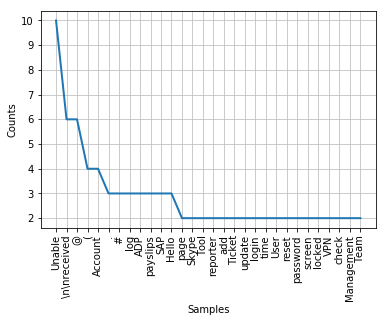

In [64]:
import matplotlib.pyplot as plt
fdist_DD.plot(30,cumulative=False)
plt.show()

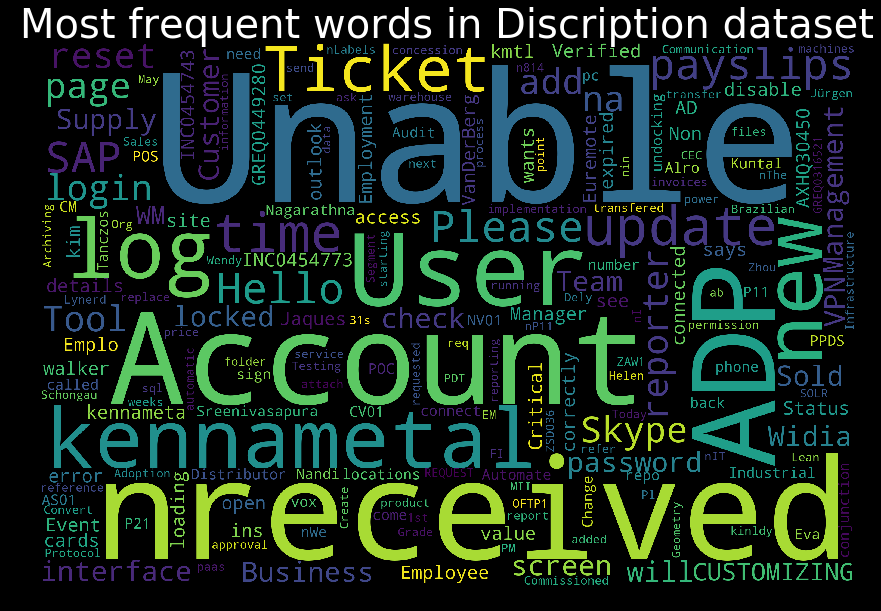

In [65]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python

# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS)
# generate word cloud using df_yelp_tip_top['text_clear']
wc_word=wc.generate(str(df_test['Description']))
print(wc_word)
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Most frequent words in Discription dataset", fontsize=40,color='white')
plt.imshow(wc_word)
plt.show()

In [66]:
#We can't convert wordcloud but wolrd could use to display most frequent words and that we can find from frequency of words
#pd.DataFrame(wc_word).to_csv('WC_DD.csv')

In [67]:
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from nltk import word_tokenize, pos_tag, pos_tag_sents
import nltk



In [68]:
sentence = "Hello I am samikkumar Shah"
sentence = nltk.word_tokenize(sentence)


In [69]:
sentence

['Hello', 'I', 'am', 'samikkumar', 'Shah']

In [70]:
arr=[]
for i in sentence:
   arr.append(str(i))




In [71]:
arr

['Hello', 'I', 'am', 'samikkumar', 'Shah']

In [72]:
sent = pos_tag (arr)
sent

[('Hello', 'NNP'),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('samikkumar', 'JJ'),
 ('Shah', 'NNP')]

In [73]:
sent = pos_tag (sentence)
sent


[('Hello', 'NNP'),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('samikkumar', 'JJ'),
 ('Shah', 'NNP')]

In [74]:
sent_clean = [x for (x,y) in sent if y not in ('NNP')]

In [75]:
sent_clean

['I', 'am', 'samikkumar']

In [76]:
pos_text = pos_tag (filtered_sent_DD)
pos_text

[('-Verified', 'VBN'),
 ('user', 'NN'),
 ('details', 'NNS'),
 ('.', '.'),
 ('(', '('),
 ('Employee', 'NNP'),
 ('#', '#'),
 ('&', 'CC'),
 ('Manager', 'NNP'),
 ('na', 'VBP'),
 ('\\n\\nreceived', 'VBN'),
 ('kim.walker', 'NN'),
 ('@', 'NNP'),
 ('kennametal.com\\n', 'VBZ'),
 ('\\n\\nreceived', 'VBN'),
 ('Jaques.VanDerBerg', 'NNP'),
 ('@', 'NNP'),
 ('kennameta', 'NN'),
 ('Unable', 'JJ'),
 ('access', 'NN'),
 ('adp', 'JJ'),
 ('page', 'NN'),
 ('Unable', 'JJ'),
 ('log', 'NN'),
 ('Euremote', 'NNP'),
 ('Skype', 'NNP'),
 ('error', 'NN'),
 ('Unable', 'NNP'),
 ('log', 'NN'),
 ('Tool', 'NNP'),
 ('reporter', 'NN'),
 ('Skype', 'NNP'),
 ('Event', 'NNP'),
 ('Critical', 'NNP'),
 ('AXHQ30450.kmtl.com', 'NNP'),
 ('The', 'DT'),
 ('value', 'NN'),
 ('GREQ0449280-', 'NNP'),
 ('Employment', 'NNP'),
 ('Status', 'NNP'),
 ('New', 'NNP'),
 ('Non-Emplo', 'NNP'),
 ('Unable', 'NNP'),
 ('disable', 'JJ'),
 ('add', 'NN'),
 ('ins', 'NNS'),
 ('outlook', 'NN'),
 ('Ticket', 'NNP'),
 ('update', 'JJ'),
 ('INC0454773', 'NNP'),
 (

In [77]:
pos_text_clean = [x for (x,y) in pos_text if y not in ('NNP')]

In [78]:
pos_text_clean

['-Verified',
 'details',
 '.',
 '(',
 '#',
 '&',
 'na',
 '\\n\\nreceived',
 'kennametal.com\\n',
 '\\n\\nreceived',
 'Unable',
 'adp',
 'Unable',
 'The',
 'disable',
 'ins',
 'update',
 'says',
 'connected',
 'unable',
 'loading',
 'correctly',
 'Unable',
 'cards',
 'wants',
 'reset',
 'open',
 'payslips',
 'update',
 'expired',
 '\\n\\nreceived',
 'k',
 'undocking',
 'come',
 'back',
 'locked',
 'Unable',
 'check',
 'payslips',
 '\\n\\nreceived',
 'kennametal.com\\',
 '24',
 'Unable',
 '25',
 'called',
 '\\n\\nreceived',
 'kennametal.com',
 '27',
 '28',
 'Unable',
 'payslips',
 '29',
 'locked',
 '26956',
 'repo',
 '26957',
 'For',
 'locations',
 '26958',
 '26959',
 '(',
 ')',
 '\\n\\nWe',
 'need',
 '26960',
 'In',
 'new',
 '26961',
 'I',
 'would',
 'like',
 'added',
 '26962',
 'replace',
 '26963',
 '#',
 '/s',
 '70929142\\n',
 '26964',
 '#',
 '/s',
 '70013672\\',
 '26965',
 'Testing',
 'folder',
 '26966',
 '\\n\\nreceived',
 'widia.com\\n\\nIT',
 '26967',
 'kinldy',
 'ask',
 'add',
 

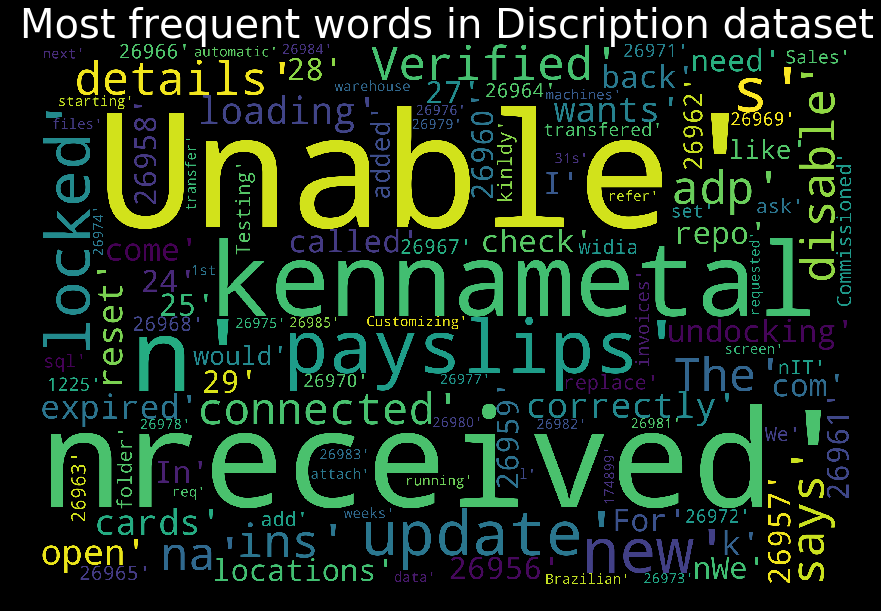

In [79]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python

# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS)
# generate word cloud using df_yelp_tip_top['text_clear']
wc_word=wc.generate(str(pos_text_clean))
print(wc_word)
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Most frequent words in Discription dataset", fontsize=40,color='white')
plt.imshow(wc_word)
plt.show()